In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### import data

In [26]:
df_emp = pd.read_excel('./data/pwc/V社_社員情報.xlsx')
df_eval = pd.read_excel('./data/pwc/V社_評価＆満足度.xlsx')
df_ret = pd.read_excel('./data/pwc/V社_退職情報.xlsx')

In [8]:
df_emp.head()

,社員のID,性別,年齢,在籍年数,採用区分,学歴区分,国籍,婚姻区分,扶養区分,転職回数,直近1年有休取得日数,直近1年残有給日数,タイトル,育児/介護休職実績有無,傷病休職実績有無,遠距離通勤者,直近1年間の100時間超の残業月数
0,159,male,41,10,中途,国内大卒,日本,未婚,子なし,0,0,40,課長クラス,なし,なし,該当なし,0
1,372,male,37,7,中途,国内大卒,日本,既婚,子なし,0,0,40,課長クラス,なし,なし,該当なし,0
2,876,male,28,3,中途,国内大卒,日本,未婚,子なし,0,0,40,主担当,なし,なし,該当なし,0
3,860,female,33,1,中途,国内大卒,日本,未婚,子なし,0,0,40,主担当,なし,なし,該当なし,0
4,888,female,29,1,中途,国内大卒,日本,未婚,子なし,0,0,40,主担当,なし,なし,該当なし,0


In [10]:
df_eval.head()

,社員#,直近評価,前年評価,同一給与レンジの滞留年数,満足度調査,上司の評価,直近1年で上司が退職,上司の在籍年数,上司への360度評価平均
0,90,C,A,3,35,B,なし,3,0.0未満
1,12,A,S,3,35,C,なし,3,1.0-2.0
2,207,A,S,3,35,B,なし,3,0.0未満
3,917,D,D,5,35,C,なし,3,0.0-1.0
4,241,D,B,3,35,B,なし,3,0.0-1.0


In [12]:
df_ret.head()

,社員ID,退職有無
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


#### Concatenate

In [29]:
eval_df = df_eval.sort_values('社員#').reset_index(drop=True)
emp_df = df_emp.sort_values('社員のID').reset_index(drop=True)

In [46]:
df_all = pd.concat([emp_df,eval_df, df_ret], axis=1)
df_all.info()
df_all.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 28 columns):
社員のID                1118 non-null int64
性別                   1118 non-null object
年齢                   1118 non-null int64
在籍年数                 1118 non-null int64
採用区分                 1118 non-null object
学歴区分                 1118 non-null object
国籍                   1118 non-null object
婚姻区分                 1118 non-null object
扶養区分                 1118 non-null object
転職回数                 1118 non-null int64
直近1年有休取得日数           1118 non-null int64
直近1年残有給日数            1118 non-null int64
タイトル                 1118 non-null object
育児/介護休職実績有無          1118 non-null object
傷病休職実績有無             1118 non-null object
遠距離通勤者               1118 non-null object
直近1年間の100時間超の残業月数    1118 non-null int64
社員#                  1118 non-null int64
直近評価                 1118 non-null object
前年評価                 1118 non-null object
同一給与レンジの滞留年数         1118 non-null int64
満足度調査               

,社員のID,性別,年齢,在籍年数,採用区分,学歴区分,国籍,婚姻区分,扶養区分,転職回数,...,直近評価,前年評価,同一給与レンジの滞留年数,満足度調査,上司の評価,直近1年で上司が退職,上司の在籍年数,上司への360度評価平均,社員ID,退職有無
0,1,female,45,2,中途,国内大卒,日本,既婚,子なし,6,...,B,B,1,58,B,なし,1,0.0未満,1,0
1,2,female,42,3,中途,海外大卒,日本,既婚,子あり,0,...,D,D,1,68,C,なし,3,0.0未満,2,0
2,3,female,45,3,中途,国内大卒,日本,既婚,子あり,1,...,B,B,2,64,B,なし,1,0.0未満,3,0
3,4,male,50,7,中途,国内大卒,日本,未婚,子なし,6,...,A,A,1,87,A,なし,2,0.0未満,4,0
4,5,female,41,3,中途,海外大卒,日本,未婚,子なし,4,...,A,A,1,50,C,なし,3,0.0未満,5,0


In [49]:
df_all.describe()

,社員のID,年齢,在籍年数,転職回数,直近1年有休取得日数,直近1年残有給日数,直近1年間の100時間超の残業月数,社員#,同一給与レンジの滞留年数,満足度調査,上司の在籍年数,社員ID,退職有無
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,559.500000,38.146691,5.829159,1.820215,20.487478,19.512522,0.252236,559.500000,1.709302,59.792487,2.940072,559.500000,0.189624
std,322.883106,5.418720,2.619117,1.748990,7.468425,7.468425,0.803344,322.883106,1.114133,14.835953,0.616822,322.883106,0.392179
min,1.000000,27.000000,1.000000,0.000000,0.000000,12.000000,0.000000,1.000000,1.000000,35.000000,0.000000,1.000000,0.000000
25%,280.250000,34.000000,4.000000,0.000000,19.000000,14.000000,0.000000,280.250000,1.000000,47.000000,3.000000,280.250000,0.000000
50%,559.500000,38.000000,6.000000,1.000000,23.000000,17.000000,0.000000,559.500000,1.000000,60.000000,3.000000,559.500000,0.000000
75%,838.750000,41.000000,8.000000,2.000000,26.000000,21.000000,0.000000,838.750000,2.000000,71.000000,3.000000,838.750000,0.000000
max,1118.000000,63.000000,10.000000,6.000000,28.000000,40.000000,6.000000,1118.000000,5.000000,88.000000,4.000000,1118.000000,1.000000


In [51]:
df_all.describe(include='O')

,性別,採用区分,学歴区分,国籍,婚姻区分,扶養区分,タイトル,育児/介護休職実績有無,傷病休職実績有無,遠距離通勤者,直近評価,前年評価,上司の評価,直近1年で上司が退職,上司への360度評価平均
count,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118
unique,2,2,2,2,2,2,5,2,2,2,5,5,5,2,4
top,female,中途,国内大卒,日本,未婚,子なし,担当,なし,なし,該当なし,B,B,B,なし,0.0-1.0
freq,857,1117,1055,1106,634,805,424,1085,1102,1057,625,725,562,1103,581


## Analysing

#### 上司への360度評価平均

In [53]:
df_all[['上司への360度評価平均','退職有無']].groupby(['上司への360度評価平均']).mean()

,退職有無
上司への360度評価平均,
0.0-1.0,0.215146
0.0未満,0.148064
1.0-2.0,0.298507
2.0以上,0.064516


#### 満足度調査

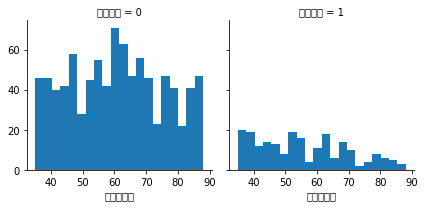

In [56]:
g = sns.FacetGrid(df_all, col='退職有無')
g.map(plt.hist, '満足度調査', bins=20)

#### 直近評価、前年度評価

In [62]:
df_all[['直近評価','退職有無']].groupby(['直近評価']).mean().sort_values(by='退職有無', ascending=False)

,退職有無
直近評価,
C,0.545455
D,0.244186
S,0.157895
B,0.148800
A,0.089844


In [64]:
df_all[['前年評価','退職有無']].groupby(['前年評価']).mean().sort_values(by='退職有無', ascending=False)

,退職有無
前年評価,
A,0.395973
D,0.263158
C,0.244444
S,0.195876
B,0.133793


In [81]:
df_all['評価推移'] = df_all['前年評価'].values + df_all['直近評価'].values
df_tmp = df_all[['評価推移','満足度調査', '退職有無']].groupby(['評価推移']).mean().sort_values(by='退職有無', ascending=False)
df_tmp1 = df_all[['評価推移','退職有無']].groupby(['評価推移']).count().sort_values(by='退職有無', ascending=False)
df_tmp = pd.merge(df_tmp, df_tmp1, on='評価推移', how='left').rename(columns={'退職有無_x':'退職率','退職有無_y':'退職数'})
df_tmp['総数'] = df_tmp['退職数']
df_tmp['退職数'] = df_tmp['総数']*df_tmp['退職率']
df_tmp

,満足度調査,退職率,退職数,総数
評価推移,,,,
DC,46.000000,1.000000,2.0,2
BC,60.800000,0.728571,51.0,70
AB,58.540000,0.520000,52.0,100
CC,57.875000,0.333333,16.0,48
BD,56.809524,0.285714,6.0,21
AC,51.750000,0.250000,3.0,12
DD,61.000000,0.236364,13.0,55
SA,57.256410,0.205128,16.0,78
CD,61.800000,0.200000,2.0,10


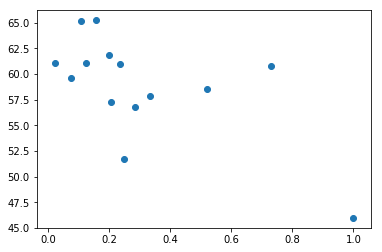

In [82]:
plt.scatter(df_tmp['退職率'].values, df_tmp['満足度調査'].values)